In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
df_600=pd.DataFrame()
df_600=pd.read_csv("600.csv")

df_60=pd.DataFrame()
df_60=pd.read_csv("60.csv")



In [4]:
# whether to run on GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")
#print(torch.cuda.get_device_name(0))

Using cpu device


In [5]:
# Split the dataset into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(df_60, df_600, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()
x_val = torch.tensor(x_val.values).float()
y_val = torch.tensor(y_val.values).float()
x_test = torch.tensor(x_test.values).float()
y_test = torch.tensor(y_test.values).float()

In [6]:
"""
class SpectrumUpscaler(nn.Module):
    def __init__(self):
        super(SpectrumUpscaler, self).__init__()
        self.fc1 = nn.Linear(5500, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 2048)
        self.fc5 = nn.Linear(2048, 4096)
        self.fc6 = nn.Linear(4096, 8192)
        self.fc7 = nn.Linear(8192, 16384)
        self.fc8 = nn.Linear(16384, 30720)
        self.fc9 = nn.Linear(30720, 5500)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = torch.tanh(self.fc5(x))
        x = torch.tanh(self.fc6(x))
        x = torch.tanh(self.fc7(x))
        x = torch.tanh(self.fc8(x))
        x = self.fc9(x)
        return x
"""


class SpectrumUpscaler(nn.Module):
    def __init__(self):
        super(SpectrumUpscaler, self).__init__()
        self.fc1 = nn.Linear(5500, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 2048)
        self.fc5 = nn.Linear(2048, 4096)
        self.fc6 = nn.Linear(4096, 8192)
        self.fc7 = nn.Linear(8192, 16384)
        self.fc8 = nn.Linear(16384, 30720)
        self.fc9 = nn.Linear(30720, 5500)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        x = torch.sigmoid(self.fc6(x))
        x = torch.sigmoid(self.fc7(x))
        x = torch.sigmoid(self.fc8(x))
        x = self.fc9(x)
        return x
"""
class SpectrumUpscaler(nn.Module):
    def __init__(self):
        super(SpectrumUpscaler, self).__init__()
        self.fc1 = nn.Linear(5500, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 2048)
        self.fc5 = nn.Linear(2048, 4096)
        self.fc6 = nn.Linear(4096, 8192)
        self.fc7 = nn.Linear(8192, 16384)
        self.fc8 = nn.Linear(16384, 30720)
        self.fc9 = nn.Linear(30720, 5500)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.relu(self.fc4(x))
        x = nn.functional.relu(self.fc5(x))
        x = nn.functional.relu(self.fc6(x))
        x = nn.functional.relu(self.fc7(x))
        x = nn.functional.relu(self.fc8(x))
        x = self.fc9(x)
        return x
"""

'\nclass SpectrumUpscaler(nn.Module):\n    def __init__(self):\n        super(SpectrumUpscaler, self).__init__()\n        self.fc1 = nn.Linear(5500, 256)\n        self.fc2 = nn.Linear(256, 512)\n        self.fc3 = nn.Linear(512, 1024)\n        self.fc4 = nn.Linear(1024, 2048)\n        self.fc5 = nn.Linear(2048, 4096)\n        self.fc6 = nn.Linear(4096, 8192)\n        self.fc7 = nn.Linear(8192, 16384)\n        self.fc8 = nn.Linear(16384, 30720)\n        self.fc9 = nn.Linear(30720, 5500)\n\n    def forward(self, x):\n        x = nn.functional.relu(self.fc1(x))\n        x = nn.functional.relu(self.fc2(x))\n        x = nn.functional.relu(self.fc3(x))\n        x = nn.functional.relu(self.fc4(x))\n        x = nn.functional.relu(self.fc5(x))\n        x = nn.functional.relu(self.fc6(x))\n        x = nn.functional.relu(self.fc7(x))\n        x = nn.functional.relu(self.fc8(x))\n        x = self.fc9(x)\n        return x\n'

In [7]:

# Define the model
model = SpectrumUpscaler()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
batch_size = 500
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    for i in range(0, x_train.shape[0], batch_size):
        # Get the batch
        batch_x = x_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)

        # Compute the loss
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Evaluate the model on the validation set
    with torch.no_grad():
        val_outputs = model(x_val)
        val_loss = criterion(val_outputs, y_val)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Evaluate the model on the test set
with torch.no_grad():
    test_outputs = model(x_test)
    test_loss = criterion(test_outputs, y_test)

print(f"Test Loss: {test_loss.item():.4f}")
 

Epoch 1/5, Train Loss: 0.0840, Val Loss: 115.0424
Epoch 2/5, Train Loss: 115.0419, Val Loss: 8.4503
Epoch 3/5, Train Loss: 8.4502, Val Loss: 1.0924
Epoch 4/5, Train Loss: 1.0925, Val Loss: 0.5163
Epoch 5/5, Train Loss: 0.5164, Val Loss: 0.2449
Test Loss: 0.2450


In [8]:
test_outputs

tensor([[-0.6009, -0.4009, -0.5260,  ..., -0.4533,  0.3780, -0.4802],
        [-0.6009, -0.4009, -0.5260,  ..., -0.4533,  0.3780, -0.4802],
        [-0.6009, -0.4009, -0.5260,  ..., -0.4533,  0.3780, -0.4802],
        ...,
        [-0.6009, -0.4009, -0.5260,  ..., -0.4533,  0.3780, -0.4802],
        [-0.6009, -0.4009, -0.5260,  ..., -0.4533,  0.3780, -0.4802],
        [-0.6009, -0.4009, -0.5260,  ..., -0.4533,  0.3780, -0.4802]])

In [9]:
df = pd.DataFrame(test_outputs.numpy())
df.to_csv('Fake_Data.csv', index=True)

In [10]:
df=df.transpose()

In [11]:
df[0]

0      -0.600941
1      -0.400933
2      -0.525986
3      -0.542328
4       0.461084
          ...   
5495   -0.483572
5496    0.421823
5497   -0.453258
5498    0.377955
5499   -0.480249
Name: 0, Length: 5500, dtype: float32

<AxesSubplot: ylabel='0'>

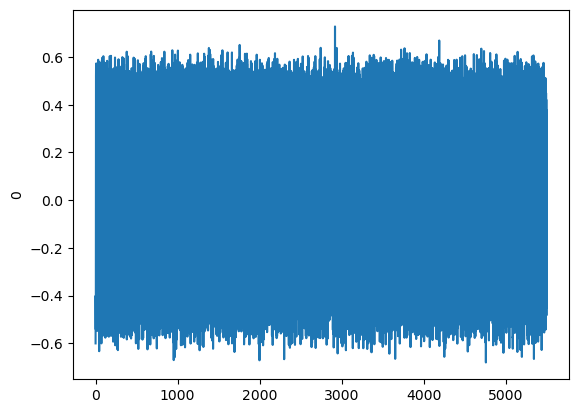

In [12]:
sb.lineplot(df[0])

In [87]:
y_test
df_y = pd.DataFrame(y_test.numpy())
df_y=df_y.transpose()

<AxesSubplot: ylabel='0'>

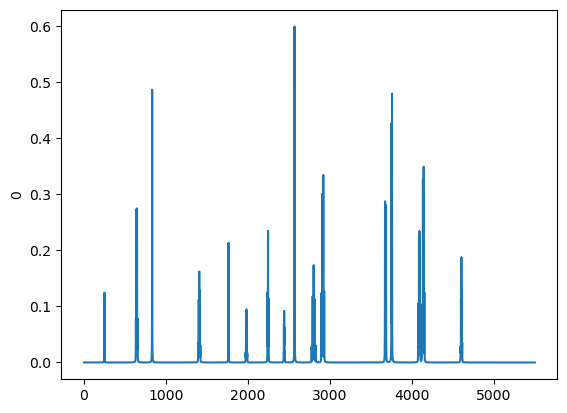

In [88]:
sb.lineplot(df_y[0])

In [77]:
df_y[0]

0       0.000004
1       0.000004
2       0.000004
3       0.000004
4       0.000004
          ...   
5495    0.000002
5496    0.000002
5497    0.000002
5498    0.000002
5499    0.000002
Name: 0, Length: 5500, dtype: float32

In [78]:
r2 = r2_score(df_y[0], df[0])
print("R2 score:", r2)

R2 score: -40187.433091420084
